# Figure S2: Soma-I representations

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import h5py

import EIANN.utils as ut
import EIANN.plot as pt
from EIANN.generate_figures import *

pt.update_plot_defaults()
root_dir = ut.get_project_root()

%load_ext autoreload
%autoreload 2

/Users/ag1880/github-repos/Milstein-Lab/EIANN/EIANN/utils/representation_analysis.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
figure_name = "FigS2_somaI"
model_list = ["bpDale_learned", "bpDale_fixed", "HebbWN_topsup"]
model_dict_all = load_model_dict()
generate_hdf5_all_seeds(model_list, model_dict_all, dataset='MNIST', variables_to_save=['accuracy'], recompute=None)

Generating plots for Backprop (learned I)
Generating plots for Backprop (fixed I)
Generating plots for Hebb (learned I)


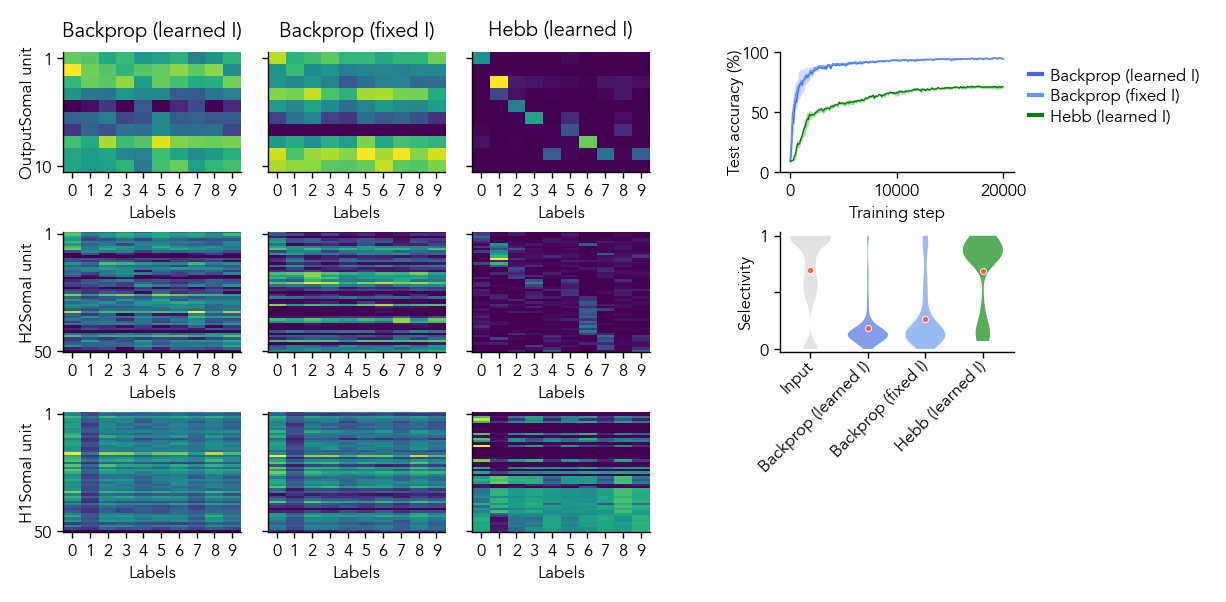

In [18]:
fig = plt.figure(figsize=(6.5, 3))
axes_heatmaps = gs.GridSpec(nrows=3, ncols=3, figure=fig,                       
                    left=0.049,right=0.5,
                    top=0.9, bottom = 0.1,
                    wspace=0.15, hspace=0.5)

metrics_axes = gs.GridSpec(nrows=3, ncols=1, figure=fig,                     
                    left=0.6,right=0.78,
                    top=0.9, bottom = 0.1,
                    wspace=0., hspace=0.5)
ax_accuracy    = fig.add_subplot(metrics_axes[0])  
ax_selectivity = fig.add_subplot(metrics_axes[1])


model_dict_all["bpDale_fixed"]["label"] = "Backprop (fixed I)"
model_dict_all["bpDale_learned"]["label"] = "Backprop (learned I)"
model_dict_all["HebbWN_topsup"]["label"] = "Hebb (learned I)"

for col, model_key in enumerate(model_list):
    model_dict = model_dict_all[model_key]
    network_name = model_dict['config'].split('.')[0]
    hdf5_path = root_dir + f"/EIANN/data/model_hdf5_plot_data/plot_data_{network_name}.h5"
    with h5py.File(hdf5_path, 'r') as f:
        data_dict = f[network_name]
        print(f"Generating plots for {model_dict['label']}")

        seed = model_dict['seeds'][0] # example seed to plot
        average_pop_activity_dict = data_dict[seed]['average_pop_activity_dict']
        populations_to_plot = [population for population in average_pop_activity_dict if 'SomaI' in population]

        for row,population in enumerate(populations_to_plot):
            ## Activity plots: batch accuracy of each population to the test dataset
            ax = fig.add_subplot(axes_heatmaps[row, col])
            pop_activity = average_pop_activity_dict[population][:]
            num_units = pop_activity.shape[1]

            pt.plot_batch_accuracy_from_data(average_pop_activity_dict, sort=True, population=population, ax=ax, cbar=False)
            ax.set_yticks([0,num_units-1])
            ax.set_yticklabels([1,num_units])
            ax.set_ylabel(f'{population} unit', labelpad=-1)
            if row==0:
                ax.set_title(model_dict["label"])
            if col>0:
                ax.set_ylabel('')
                ax.set_yticklabels([])

        plot_accuracy_all_seeds(data_dict, model_dict, ax=ax_accuracy)
        legend = ax_accuracy.legend(ncol=1, bbox_to_anchor=(1., 1.), loc='upper left', fontsize=6)
        for line in legend.get_lines():
            line.set_linewidth(1.5)
        plot_metric_all_seeds(data_dict, model_dict, populations_to_plot=populations_to_plot, ax=ax_selectivity, metric_name='selectivity', plot_type='violin')


fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.png", dpi=300)
fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.svg", dpi=300)